<a href="https://colab.research.google.com/github/Hengameh1392/Health/blob/main/Copy_of_Copy_of_F_Solar_Curtailmentv13_A_feature_selection_spearman_withoutPeak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Preprocessing

##1.1 Import necessary

In [ ]:
#mount google drive
import os, sys
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataset_path = "gdrive/MyDrive/Curtailment/AllMerged.csv"

In [ ]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing

## 1.2 Read data and merge records

In [ ]:
df_data = pd.read_csv(dataset_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862785 entries, 0 to 862784
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            862785 non-null  object 
 1   Hour                            862785 non-null  int64  
 2   Interval                        862785 non-null  int64  
 3   Load                            862785 non-null  int64  
 4   Solar                           862785 non-null  int64  
 5   Wind                            862785 non-null  int64  
 6   Net Load                        862785 non-null  int64  
 7   Renewables                      862785 non-null  int64  
 8   Nuclear                         862785 non-null  int64  
 9   Large Hydro                     862785 non-null  int64  
 10  Imports                         862785 non-null  int64  
 11  Generation                      862785 non-null  int64  
 12  Thermal         

In [ ]:
df_data.rename(columns = {'Wind Curtailment':'Wind_Curtailment','Solar Curtailment':'Solar_Curtailment'}, inplace = True)

In [ ]:
df_data[df_data.Solar_Curtailment!=0]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment
695,2014-05-03,11,11,26129,4266,2370,19494,8236,2288,1731,8339,17789,5534,1,0.0,67.0
696,2014-05-03,11,12,26147,4279,2413,19456,8292,2287,1760,8283,17860,5520,4,0.0,147.0
702,2014-05-03,12,6,26521,4197,2477,19847,8287,2287,1840,8433,18092,5678,-4,0.0,9.0
703,2014-05-03,12,7,26603,4167,2491,19945,8272,2287,1863,8477,18126,5705,0,0.0,87.0
704,2014-05-03,12,8,26675,4169,2481,20025,8262,2287,1865,8515,18161,5746,-2,0.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862720,2022-06-30,19,8,36655,6451,3818,26386,11971,2266,3468,4434,32220,14516,1,0.0,26.0
862721,2022-06-30,19,9,36628,5934,3841,26853,11477,2266,3500,4539,32086,14843,2,0.0,17.0
862722,2022-06-30,19,10,36540,5435,3824,27281,10961,2266,3560,4552,31992,15206,-4,0.0,9.0
862723,2022-06-30,19,11,36546,4920,3811,27815,10435,2265,3589,4759,31801,15511,-13,0.0,5.0


In [ ]:
df_mean=df_data.groupby(['Date','Hour']).mean()
df_mean

Interval          Load        Solar         Wind  \
Date       Hour                                                     
2014-05-01 1          6.5  23355.750000     0.000000   280.833333   
           2          6.5  22256.916667     0.000000   360.166667   
           3          6.5  21871.166667     0.000000   480.333333   
           4          6.5  21789.833333     0.000000   598.250000   
           5          6.5  22113.750000     0.000000   469.583333   
...                   ...           ...          ...          ...   
2022-06-30 20         6.5  35761.333333  1736.416667  3784.583333   
           21         6.5  34867.666667    15.666667  3772.083333   
           22         6.5  33819.500000     0.000000  3992.166667   
           23         6.5  31523.000000     0.000000  4164.333333   
           24         6.5  29020.916667     0.000000  4091.250000   

                     Net Load   Renewables      Nuclear  Large Hydro  \
Date       Hour                                                        
2014-05-01 1     23074.666667  1848.416667  2287.250000  1399.083333   
           2     21896.750000  1919.833333  2287.500000  1115.166667   
           3     21390.750000  2010.666667  2286.083333  1269.750000   
           4     21191.500000  2135.166667  2286.500000  1382.083333   
           5     21644.250000  2007.750000  2287.416667  1130.666667   
...                       ...          ...          ...          ...   
2022-06-30 20    30240.666667  7240.083333  2265.083333  4294.333333   
           21    31079.916667  5553.416667  2266.083333  4271.750000   
           22    29827.333333  5766.333333  2266.916667  3969.333333   
           23    27358.750000  5862.333333  2268.500000  3312.250000   
           24    24929.500000  5784.833333  2270.416667  2911.000000   

                     Imports    Generation       Thermal  \
Date       Hour                                            
2014-05-01 1     7413.166667  15940.333333  10405.750000   
           2     7399.666667  14857.916667   9535.833333   
           3     7468.333333  14402.583333   8836.166667   
           4     7436.250000  14353.250000   8549.750000   
           5     7536.333333  14576.833333   9151.333333   
...                      ...           ...           ...   
2022-06-30 20    4850.083333  30904.833333  17105.500000   
           21    4643.166667  30219.416667  18128.166667   
           22    5272.416667  28538.250000  16536.000000   
           23    6193.666667  25311.250000  13868.250000   
           24    7081.250000  21926.333333  10960.166667   

                 Load Less (Generation+Imports)  Wind_Curtailment  \
Date       Hour                                                     
2014-05-01 1                           2.083333              0.00   
           2                          -0.666667              0.00   
           3                           0.250000              0.00   
           4                           0.166667              0.00   
           5                           0.750000              0.00   
...                                         ...               ...   
2022-06-30 20                          6.583333              0.00   
           21                          5.250000              2.25   
           22                          8.666667              0.00   
           23                         17.916667              0.00   
           24                         13.250000              0.00   

                 Solar_Curtailment  
Date       Hour                     
2014-05-01 1                   0.0  
           2                   0.0  
           3                   0.0  
           4                   0.0  
           5                   0.0  
...                            ...  
2022-06-30 20                  0.0  
           21                  0.0  
           22                  0.0  
           23                  0.0  
           24                  0.0  

[71569 rows x 14 colu

In [ ]:
df_mean = df_mean.reset_index()
df_mean

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0


##1.3 Split by month

In [ ]:
df_mean['month']=pd.DatetimeIndex(df_mean['Date']).month



In [ ]:
df_mean.head()

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month
0,2014-05-01,1,6.5,23355.750000,0.0,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.0,0.0,5
1,2014-05-01,2,6.5,22256.916667,0.0,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.0,0.0,5
2,2014-05-01,3,6.5,21871.166667,0.0,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.0,0.0,5
3,2014-05-01,4,6.5,21789.833333,0.0,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.0,0.0,5
4,2014-05-01,5,6.5,22113.750000,0.0,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.0,0.0,5


#2.Feature Extraction

##2.1 Biomass_Geothermal

In [ ]:
df_mean["Biomass_geothermal"]=df_mean["Renewables"]-df_mean["Solar"]-df_mean["Wind"]

##2.2 Extract Business days

### Find holidays


In [ ]:
df_mean["isBusDay"]=1
df_mean


,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0,5,1567.583333,1
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0,5,1559.666667,1
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0,5,1530.333333,1
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0,5,1536.916667,1
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0,5,1538.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0,6,1719.083333,1
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0,6,1765.666667,1
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0,6,1774.166667,1
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0,6,1698.000000,1


In [ ]:
#find Holdays

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-01-01', end='2022-12-31').to_pydatetime()
#print(holidays)
holidays=pd.to_datetime(holidays)
print(holidays)

DatetimeIndex(['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
      

In [ ]:
#change type to datatime
df_mean['Date']=pd.to_datetime(df_mean['Date'])

In [ ]:
df_mean.loc[df_mean[df_mean['Date'].isin(holidays)].index,'isBusDay']=0
#df_mean
df_mean[df_mean.isBusDay==0]

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
600,2014-05-26,1,6.5,22879.000000,0.000000,3669.000000,19210.166667,5300.083333,2281.750000,1863.583333,7543.250000,15335.916667,5890.666667,-0.250000,0.0,0.000000,5,1631.083333,0
601,2014-05-26,2,6.5,21711.166667,0.000000,3741.833333,17969.166667,5371.833333,2281.416667,1671.416667,7258.583333,14451.833333,5127.166667,0.916667,0.0,0.000000,5,1630.000000,0
602,2014-05-26,3,6.5,20923.833333,0.000000,3755.333333,17168.583333,5389.500000,2279.416667,1636.666667,7286.250000,13637.750000,4332.166667,0.166667,0.0,0.000000,5,1634.166667,0
603,2014-05-26,4,6.5,20599.416667,0.000000,3697.916667,16901.416667,5334.833333,2279.833333,1671.750000,7275.750000,13323.166667,4036.750000,0.416667,0.0,0.000000,5,1636.916667,0
604,2014-05-26,5,6.5,20779.166667,0.000000,3555.000000,17224.333333,5181.000000,2281.583333,1819.250000,7279.666667,13500.250000,4218.583333,-0.416667,0.0,0.000000,5,1626.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71324,2022-06-20,20,6.5,35921.916667,1763.583333,1044.250000,33114.166667,4458.000000,2275.500000,3628.666667,8472.750000,27442.500000,17080.166667,6.583333,0.0,0.083333,6,1650.166667,0
71325,2022-06-20,21,6.5,34889.333333,59.166667,1525.833333,33304.083333,3255.166667,2274.416667,3723.250000,8627.833333,26254.666667,17002.166667,6.583333,0.0,0.000000,6,1670.166667,0
71326,2022-06-20,22,6.5,33603.000000,0.000000,1689.833333,31913.166667,3372.500000,2272.666667,3594.416667,8798.333333,24793.000000,15553.500000,11.666667,0.0,0.000000,6,1682.666667,0
71327,2022-06-20,23,6.5,31044.333333,0.000000,1723.083333,29321.166667,3380.500000,2272.750000,2773.333333,9557.583333,21467.083333,13040.333333,19.583333,0.0,0.000000,6,1657.416667,0


###Find weekend


In [ ]:
weekend=pd.bdate_range(start='2014-01-01', end='2022-12-31', freq="C", weekmask="Sat Sun").to_pydatetime()
df_mean.loc[df_mean[df_mean['Date'].isin(weekend)].index,'isBusDay']=0
#df_mean
df_mean[df_mean.isBusDay==0]




,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
48,2014-05-03,1,6.5,24036.500000,0.000000,2932.500000,21104.250000,4501.666667,2288.750000,1632.583333,7909.166667,16127.083333,7704.250000,0.250000,0.0,0.0,5,1569.166667,0
49,2014-05-03,2,6.5,22419.250000,0.000000,2771.333333,19648.000000,4320.500000,2289.666667,1540.833333,7938.083333,14482.250000,6331.333333,-1.083333,0.0,0.0,5,1549.166667,0
50,2014-05-03,3,6.5,21589.333333,0.000000,2657.833333,18931.666667,4201.083333,2289.416667,1555.333333,7984.583333,13604.000000,5558.333333,0.833333,0.0,0.0,5,1543.250000,0
51,2014-05-03,4,6.5,21348.000000,0.000000,2371.916667,18976.166667,3882.500000,2289.833333,1489.083333,8025.916667,13323.000000,5661.666667,-0.666667,0.0,0.0,5,1510.583333,0
52,2014-05-03,5,6.5,21226.083333,0.000000,2172.416667,19053.583333,3689.000000,2290.000000,1567.833333,8029.083333,13197.583333,5650.416667,-0.500000,0.0,0.0,5,1516.583333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71468,2022-06-26,20,6.5,36528.666667,1541.500000,2523.000000,32464.083333,5759.666667,2266.166667,3196.083333,5142.083333,31375.166667,20153.083333,11.416667,0.0,0.0,6,1695.166667,0
71469,2022-06-26,21,6.5,35245.333333,9.416667,2474.666667,32761.250000,4174.500000,2266.333333,2749.666667,6330.333333,28907.250000,19716.750000,7.416667,0.0,0.0,6,1690.416667,0
71470,2022-06-26,22,6.5,33805.666667,0.000000,2398.916667,31406.750000,4080.000000,2267.666667,2317.333333,7152.333333,26639.083333,17973.833333,14.416667,0.0,0.0,6,1681.083333,0
71471,2022-06-26,23,6.5,31356.750000,0.000000,2555.166667,28801.583333,4217.083333,2268.083333,1882.666667,7907.333333,23433.000000,15065.416667,16.250000,0.0,0.0,6,1661.916667,0


In [ ]:
df_mean

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,month,Biomass_geothermal,isBusDay
0,2014-05-01,1,6.5,23355.750000,0.000000,280.833333,23074.666667,1848.416667,2287.250000,1399.083333,7413.166667,15940.333333,10405.750000,2.083333,0.00,0.0,5,1567.583333,1
1,2014-05-01,2,6.5,22256.916667,0.000000,360.166667,21896.750000,1919.833333,2287.500000,1115.166667,7399.666667,14857.916667,9535.833333,-0.666667,0.00,0.0,5,1559.666667,1
2,2014-05-01,3,6.5,21871.166667,0.000000,480.333333,21390.750000,2010.666667,2286.083333,1269.750000,7468.333333,14402.583333,8836.166667,0.250000,0.00,0.0,5,1530.333333,1
3,2014-05-01,4,6.5,21789.833333,0.000000,598.250000,21191.500000,2135.166667,2286.500000,1382.083333,7436.250000,14353.250000,8549.750000,0.166667,0.00,0.0,5,1536.916667,1
4,2014-05-01,5,6.5,22113.750000,0.000000,469.583333,21644.250000,2007.750000,2287.416667,1130.666667,7536.333333,14576.833333,9151.333333,0.750000,0.00,0.0,5,1538.166667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71564,2022-06-30,20,6.5,35761.333333,1736.416667,3784.583333,30240.666667,7240.083333,2265.083333,4294.333333,4850.083333,30904.833333,17105.500000,6.583333,0.00,0.0,6,1719.083333,1
71565,2022-06-30,21,6.5,34867.666667,15.666667,3772.083333,31079.916667,5553.416667,2266.083333,4271.750000,4643.166667,30219.416667,18128.166667,5.250000,2.25,0.0,6,1765.666667,1
71566,2022-06-30,22,6.5,33819.500000,0.000000,3992.166667,29827.333333,5766.333333,2266.916667,3969.333333,5272.416667,28538.250000,16536.000000,8.666667,0.00,0.0,6,1774.166667,1
71567,2022-06-30,23,6.5,31523.000000,0.000000,4164.333333,27358.750000,5862.333333,2268.500000,3312.250000,6193.666667,25311.250000,13868.250000,17.916667,0.00,0.0,6,1698.000000,1


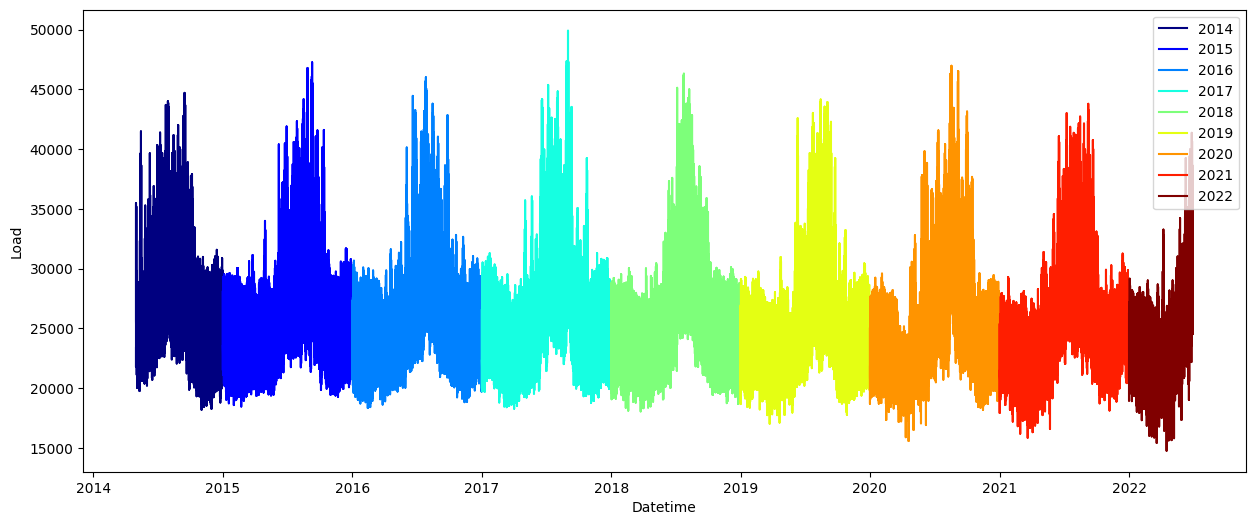

In [ ]:
df_plot=df_mean.copy()

# Create a new figure with the desired size
fig = plt.figure(figsize=(15, 6))

df_plot['year'] = df_plot['Date'].dt.year

# Get a list of unique years in the data
years = df_plot['year'].unique()

# Create a color map to assign a different color to each year
colors = plt.cm.jet(np.linspace(0, 1, len(years)))

# Plot the data for each year
for i, year in enumerate(years):
    data = df_plot[df_plot['year'] == year]
    plt.plot(data['Date'], data['Load'], color=colors[i], label=year)

plt.xlabel('Datetime')
plt.ylabel('Load')
plt.legend()
# Save the plot to a file
plt.savefig('plot-color.png', dpi=300)
plt.show()

#3.Feature Selection

##3.1 corellation matrix

In [ ]:
X_numeric_reg=df_mean.drop(['Date','Interval'],axis=1)[:-1].reset_index(drop=True)
y_reg_solar=df_mean['Solar_Curtailment'][1:].reset_index(drop=True) #next hour
y_reg_wind=df_mean['Wind_Curtailment'][1:].reset_index(drop=True) #next hour

In [ ]:
mean_4norm=X_numeric_reg.mean(axis=0)
X_numeric_reg-=mean_4norm
std_4norm=X_numeric_reg.std(axis=0)
X_numeric_reg/=std_4norm

mean_4norm=y_reg_solar.mean(axis=0)
y_reg_solar-=mean_4norm
std_4norm=y_reg_solar.std(axis=0)
y_reg_solar/=std_4norm

mean_4norm=y_reg_wind.mean(axis=0)
y_reg_wind-=mean_4norm
std_4norm=y_reg_wind.std(axis=0)
y_reg_wind/=std_4norm

In [ ]:
import seaborn as sns
X_numeric_reg.rename(columns = {'Load Less (Generation+Imports)':'Sub_Load','Biomass_geothermal':'Bio_Geo',
                                'month':'Month','isBusDay':'Work_Day','Solar_Curtailment':'Solar_Cur_t','Wind_Curtailment':'Wind_Cur_t'}, inplace = True)
df_core=pd.concat([X_numeric_reg, y_reg_solar,y_reg_wind],axis=1).corr()
df_core.rename(columns = {'Solar_Curtailment':'Solar_Cur_t+1','Wind_Curtailment':'Wind_Cur+1'}, inplace = True)

#df_core.style.background_gradient(sns.light_palette('green', as_cmap=True))
styled_df = df_core.style.background_gradient(cmap='coolwarm').format("{:.3f}")
styled_df

,Hour,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Sub_Load,Wind_Cur_t,Solar_Cur_t,Month,Bio_Geo,Work_Day,Solar_Cur_t+1,Wind_Cur+1
Hour,1.000,0.472,0.069,0.076,0.346,0.099,0.000,0.281,0.093,0.426,0.342,0.078,0.008,0.014,-0.000,0.145,-0.000,-0.022,-0.008
Load,0.472,1.000,0.166,0.026,0.749,0.184,0.158,0.451,0.214,0.896,0.765,-0.029,-0.117,-0.196,0.192,0.272,0.220,-0.197,-0.116
Solar,0.069,0.166,1.000,-0.105,-0.493,0.943,-0.001,-0.133,-0.727,0.495,-0.245,-0.188,0.144,0.363,-0.036,-0.050,0.012,0.344,0.137
Wind,0.076,0.026,-0.105,1.000,-0.127,0.228,0.034,0.177,-0.078,0.061,-0.195,0.071,0.115,0.092,-0.117,0.134,-0.008,0.080,0.109
Net Load,0.346,0.749,-0.493,-0.127,1.000,-0.513,0.129,0.439,0.681,0.435,0.866,0.084,-0.221,-0.428,0.215,0.239,0.184,-0.414,-0.214
Renewables,0.099,0.184,0.943,0.228,-0.513,1.000,0.019,-0.043,-0.728,0.513,-0.305,-0.161,0.175,0.378,-0.078,0.043,0.008,0.355,0.165
Nuclear,0.000,0.158,-0.001,0.034,0.129,0.019,1.000,0.104,0.073,0.123,-0.015,-0.006,-0.035,-0.043,-0.082,0.176,0.003,-0.043,-0.035
Large Hydro,0.281,0.451,-0.133,0.177,0.439,-0.043,0.104,1.000,0.258,0.330,0.140,0.028,-0.102,-0.189,-0.074,0.633,0.060,-0.185,-0.098
Imports,0.093,0.214,-0.727,-0.078,0.681,-0.728,0.073,0.258,1.000,-0.242,0.306,0.135,-0.223,-0.483,0.080,0.198,0.059,-0.450,-0.209
Generation,0.426,0.896,0.495,0.061,0.435,0.513,0.123,0.330,-0.242,1.000,0.621,-0.091,-0.015,0.025,0.155,0.180,0.192,0.009,-0.020


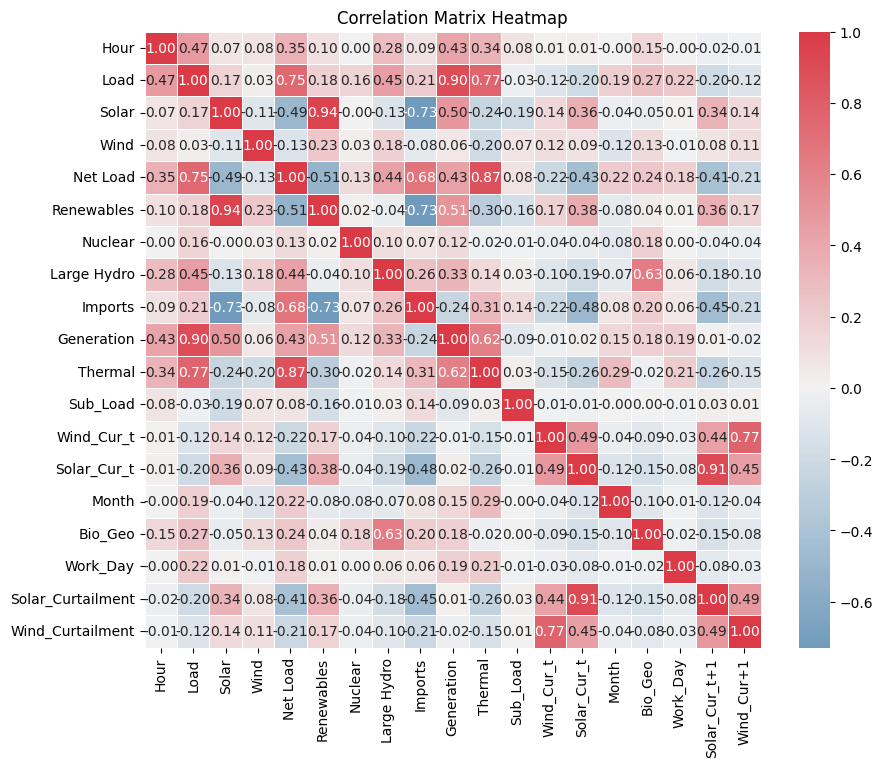

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_numeric_reg, y_reg_solar, and y_reg_wind are already defined and contain the data
# Renaming columns as you have done (make sure this is done correctly prior to this step)
X_numeric_reg.rename(columns={
    'Load Less (Generation+Imports)': 'Sub_Load',
    'Biomass_geothermal': 'Bio_Geo',
    'month': 'Month',
    'isBusDay': 'Work_Day',
    'Solar_Curtailment': 'Solar_Cur_t',
    'Wind_Curtailment': 'Wind_Cur_t'}, inplace=True)

df_core = pd.concat([X_numeric_reg, y_reg_solar, y_reg_wind], axis=1).corr()
df_core.rename(columns={'Solar_Curtailment': 'Solar_Cur_t+1', 'Wind_Curtailment': 'Wind_Cur+1'}, inplace=True)

# Using Seaborn to create the heatmap with a diverging palette
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)  # Blue to red palette
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(df_core, annot=True, fmt=".2f", cmap=cmap, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')  # Set the title of the heatmap
plt.show()
# Save the heatmap as a PNG image
heatmap_file_path = 'heatmap.png'
plt.savefig(heatmap_file_path, dpi=300, bbox_inches='tight')

# To download the file, you'd typically use a Python environment or interface that supports file downloads.
# In a Jupyter notebook environment, for example, you could use the following:
# Creates a download link for the saved heatmap image.
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Your code to generate the heatmap
# ... (make sure to generate your plot here)

# Save the figure to a file
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Use the Google Colab files module to download the saved figure
files.download('heatmap.png')

# Show the plot
plt.show()





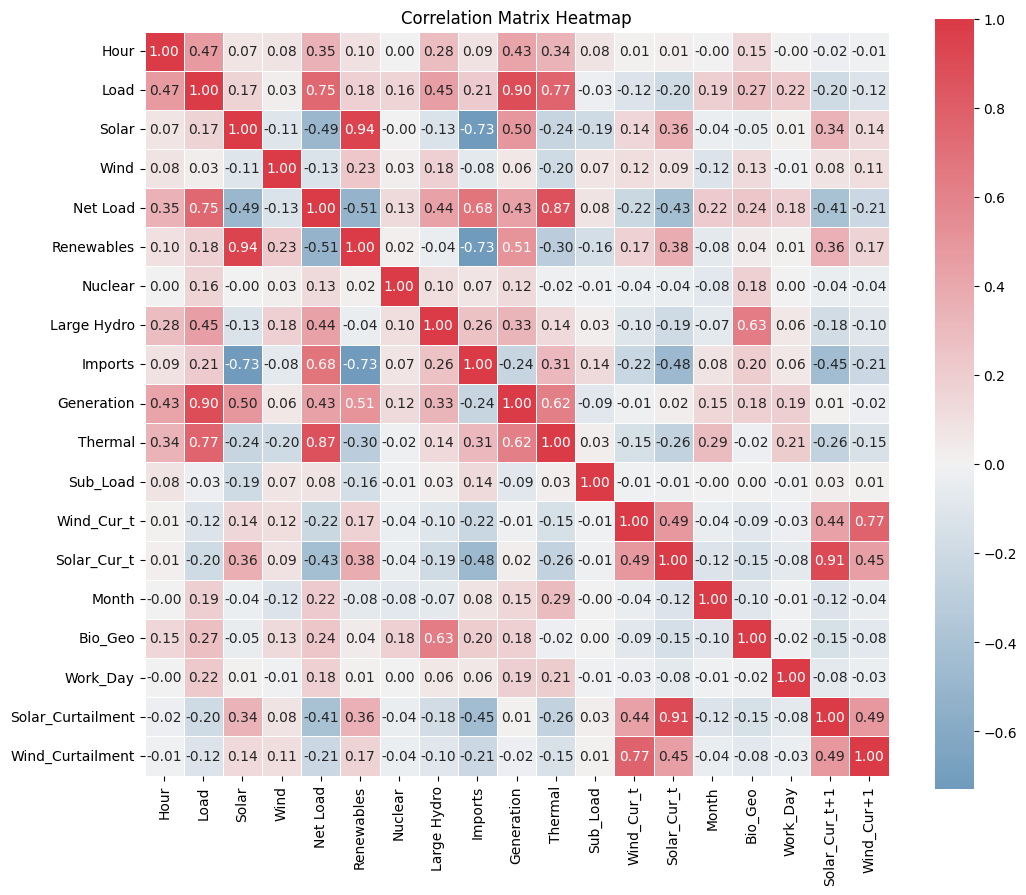

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_core is already defined and is your correlation matrix
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True) is good for the heatmap

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))
sns.heatmap(df_core, annot=True, fmt=".2f", cmap=cmap, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')

# IMPORTANT: Save the figure before calling plt.show()
heatmap_file_path = 'heatmap.png'
plt.savefig(heatmap_file_path, dpi=300, bbox_inches='tight')

# Now you can display the plot
plt.show()
files.download(heatmap_file_path)

# If you're using an environment like Google Colab, include this:
# from google.colab import files
# files.download('heatmap.png')


## 3.2 spearman and person

In [ ]:
from scipy.stats import f, spearmanr, pearsonr

def f_test(X, y, target, mode):

    # Do F-test using Pearson correlation
    if mode.lower() == 'pearsonr':

        temp = []
        for col in X.columns:
            corr, _ = pearsonr(X[col].values, y)
            temp.append(corr)

        df = pd.DataFrame(temp, columns=['pearsonr'], index=X.columns)


    # Do F-test using Pearson's rank correlation
    elif mode.lower() == 'spearmanr':

        corr, _ = spearmanr(X,y)
        df = pd.DataFrame(corr[:-1,-1], columns=['spearman'], index=X.columns)

    else:
        return


    degree_of_freedom = len(y)-2
    df['F-score'] = df.iloc[:,0].apply(lambda x: x**2/(1-x**2)*degree_of_freedom)
    df['p-value'] = f.sf(df['F-score'], 1, degree_of_freedom)
    return df

res=f_test(X_numeric_reg, y_reg_solar, target='Profit', mode='pearsonr')
res.sort_values(by=['F-score'],ascending=False)

,pearsonr,F-score,p-value
Solar_Cur_t,0.911063,349497.619436,0.000000e+00
Imports,-0.450291,18201.398179,0.000000e+00
Wind_Cur_t,0.440563,17236.092317,0.000000e+00
Net Load,-0.414223,14822.654827,0.000000e+00
Renewables,0.355411,10347.016568,0.000000e+00
Solar,0.343621,9581.529803,0.000000e+00
Thermal,-0.264061,5364.193753,0.000000e+00
Load,-0.197100,2892.584088,0.000000e+00
Large Hydro,-0.184614,2525.196884,0.000000e+00
Bio_Geo,-0.149938,1645.900573,0.000000e+00


In [ ]:
res=f_test(X_numeric_reg, y_reg_solar, target='Profit', mode='spearmanr')

res.sort_values(by=['F-score'],ascending=False)

,spearman,F-score,p-value
Solar_Cur_t,0.841991,174321.831790,0.000000e+00
Solar,0.733395,83294.801402,0.000000e+00
Renewables,0.648086,51826.914191,0.000000e+00
Imports,-0.556355,32082.334260,0.000000e+00
Net Load,-0.515602,25914.879931,0.000000e+00
Thermal,-0.376079,11789.377599,0.000000e+00
Wind_Cur_t,0.367207,11154.054587,0.000000e+00
Generation,0.282543,6208.809862,0.000000e+00
Large Hydro,-0.176681,2305.996005,0.000000e+00
Sub_Load,-0.112400,915.714155,6.917400e-200


In [ ]:
res=res.sort_values(by=['F-score'],ascending=False)
print(res.index)
print(res['spearman'].values)

all_Features=['Solar_Curtailment', 'Solar', 'Renewables', 'Imports', 'Net Load', 'Thermal',
       'Wind_Curtailment', 'Generation', 'Large Hydro', 'Load Less (Generation+Imports)', 'month', 'Hour',
       'Biomass_geothermal', 'Load', 'Wind', 'Nuclear', 'isBusDay']

selectedFeatures=['Solar_Curtailment', 'Solar', 'Renewables', 'Imports', 'Net Load', 'Thermal',
       'Wind_Curtailment', 'Generation', 'Large Hydro', 'Load Less (Generation+Imports)', 'month']
print(selectedFeatures)
#print(res['F-score'].values)

Index(['Solar_Cur_t', 'Solar', 'Renewables', 'Imports', 'Net Load', 'Thermal',
       'Wind_Cur_t', 'Generation', 'Large Hydro', 'Sub_Load', 'Month', 'Hour',
       'Bio_Geo', 'Load', 'Wind', 'Nuclear', 'Work_Day'],
      dtype='object')
[ 0.84199085  0.73339543  0.64808589 -0.55635477 -0.51560234 -0.37607861
  0.36720702  0.2825431  -0.1766808  -0.11239985 -0.08321975 -0.06702526
 -0.06188763 -0.05790459 -0.04678283 -0.03558728 -0.00660909]
['Solar_Curtailment', 'Solar', 'Renewables', 'Imports', 'Net Load', 'Thermal', 'Wind_Curtailment', 'Generation', 'Large Hydro', 'Load Less (Generation+Imports)', 'month']


#4.Cluster data

##4.1 Fuzzy clustring

In [ ]:
pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.1
    Uninstalling pydantic-2.6.1:
      Successfully uninstalled pydantic-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


In [ ]:
df_month_mean=df_mean.groupby(['month']).mean()
df_month_mean

<ipython-input-30-3000d4938162>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month_mean=df_mean.groupby(['month']).mean()


,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports),Wind_Curtailment,Solar_Curtailment,Biomass_geothermal,isBusDay
month,,,,,,,,,,,,,,,,,
1,12.500000,6.500421,23763.096244,1835.852132,1017.486148,20909.758058,4530.919090,2172.842599,1732.928429,7315.279380,16447.869474,8011.187008,-0.048351,3.817652,50.468377,1677.580809,0.649194
2,12.500000,6.500015,23321.928681,2522.102814,1412.888068,19386.936450,5636.998729,1920.215186,1821.577904,6700.056449,16621.818858,7243.024840,0.051566,7.136027,134.575923,1702.007848,0.676991
3,12.519529,6.499953,22998.017058,2906.217830,1731.119111,18360.681125,6349.317895,1879.715703,2103.510758,6159.722385,16838.300461,6505.756547,-0.003177,13.656555,214.002903,1711.980954,0.723232
4,12.500000,6.497784,22909.053667,3526.878778,2388.919190,16993.253643,7599.969369,1953.307785,2414.166912,5312.559413,17596.559806,5629.111396,-0.066860,15.864275,230.717746,1684.171401,0.712500
5,12.500000,6.499022,24244.608359,3641.654179,2613.422322,17988.502656,7986.962501,2005.569568,2596.977741,6106.121302,18138.528118,5549.015982,-0.038331,11.186170,191.996552,1731.886000,0.677419
6,12.500000,6.499361,27796.093535,3949.709110,2585.208636,21261.176830,8309.354284,2151.519417,2687.844198,6573.915959,21222.230327,8073.512781,-0.054273,5.676226,77.959789,1774.436538,0.711111
7,12.500000,6.499750,30719.434499,3593.115175,2214.520174,24911.789050,7599.024334,2183.514074,2848.520513,6991.216626,23728.234330,11097.174460,-0.016339,2.017403,17.917649,1791.388986,0.685484
8,12.500000,6.499855,31042.314435,3442.726652,2095.585516,25503.957137,7307.247762,2225.863190,2566.527930,7090.179625,23952.150914,11852.510666,-0.017534,1.721774,16.836354,1768.935594,0.709677
9,12.500000,6.499978,28883.043603,3133.438654,1621.619403,24127.970282,6498.512703,2192.284467,2185.461785,7428.411585,21454.690936,10578.432111,-0.056934,2.893218,34.947531,1743.454646,0.683333


In [ ]:
##Fuzzy c-means
import numpy as np
from fcmeans import FCM
from sklearn.metrics import silhouette_samples

Solar_curtailment_mean=df_month_mean['Solar_Curtailment'].values
#print(Solar_curtailment_mean
Solar_curtailment_mean=np.expand_dims(Solar_curtailment_mean, axis=1)
#print(Solar_curtailment_mean)

my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(Solar_curtailment_mean) ## X, numpy array. rows:samples columns:features


centers = my_model.centers
#print((centers))
cluster_labels = my_model.predict(Solar_curtailment_mean)
print(cluster_labels)
soft_pred=my_model.soft_predict(Solar_curtailment_mean)
print(soft_pred)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Solar_curtailment_mean, cluster_labels)
print(sample_silhouette_values)
silhout_value_c0=sample_silhouette_values[cluster_labels==0]
silhout_value_c1=sample_silhouette_values[cluster_labels==1]
print(silhout_value_c0)
print(silhout_value_c1)

[1 0 0 0 0 1 1 1 1 1 1 1]
[[1.72202532e-03 9.98277975e-01]
 [6.40894580e-01 3.59105420e-01]
 [9.95236593e-01 4.76340711e-03]
 [9.77248437e-01 2.27515628e-02]
 [9.95209563e-01 4.79043651e-03]
 [6.88408636e-02 9.31159136e-01]
 [1.98707109e-02 9.80129289e-01]
 [2.12609651e-02 9.78739035e-01]
 [3.02566036e-03 9.96974340e-01]
 [2.95043548e-02 9.70495645e-01]
 [2.56115604e-04 9.99743884e-01]
 [1.48905504e-03 9.98510945e-01]]
[0.85158573 0.1505664  0.76949798 0.73063047 0.73541998 0.6536192
 0.83338432 0.8291416  0.87705104 0.7528692  0.87706428 0.88006109]
[0.1505664  0.76949798 0.73063047 0.73541998]
[0.85158573 0.6536192  0.83338432 0.8291416  0.87705104 0.7528692
 0.87706428 0.88006109]


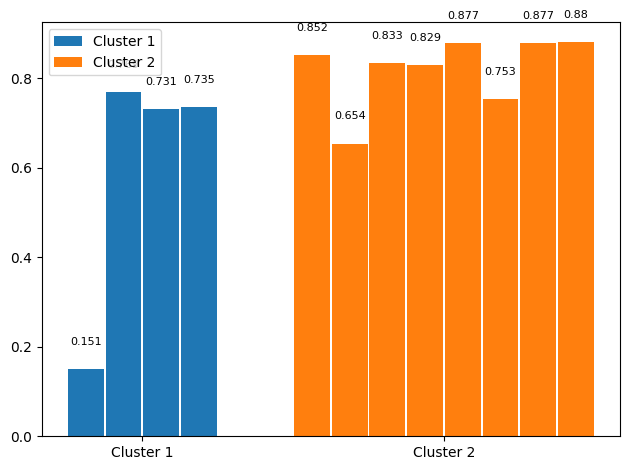

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import collections
def bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95,
             legend=True, x_labels=True, label_fontsize=8,
             colors=None, barlabel_offset=1,
             bar_labeler=lambda k, i, s: str(round(s, 3))):
    """
    Draws a bar plot with multiple bars per data point.
    :param dict data: The data we want to plot, wher keys are the names of each
      bar group, and items is a list of bar values for the corresponding group.
    :param float group_stretch: 1 means groups occupy the most (largest groups
      touch side to side if they have equal number of bars).
    :param float bar_stretch: If 1, bars within a group will touch side to side.
    :param bool x_labels: If true, x-axis will contain labels with the group
      names given at data, centered at the bar group.
    :param int label_fontsize: Font size for the label on top of each bar.
    :param float barlabel_offset: Distance, in y-values, between the top of the
      bar and its label.
    :param function bar_labeler: If not None, must be a functor with signature
      ``f(group_name, i, scalar)->str``, where each scalar is the entry found at
      data[group_name][i]. When given, returns a label to put on the top of each
      bar. Otherwise no labels on top of bars.
    """
    sorted_data = list(sorted(data.items(), key=lambda elt: elt[0]))
    sorted_k, sorted_v  = zip(*sorted_data)
    max_n_bars = max(len(v) for v in data.values())
    group_centers = np.cumsum([max_n_bars
                               for _ in sorted_data]) - (max_n_bars / 2)
    bar_offset = (1 - bar_stretch) / 2
    bars = collections.defaultdict(list)
    #
    if colors is None:
        colors = {g_name: [f"C{i}" for _ in values]
                  for i, (g_name, values) in enumerate(data.items())}
    #
    for g_i, ((g_name, vals), g_center) in enumerate(zip(sorted_data,
                                                         group_centers)):
        n_bars = len(vals)
        group_beg = g_center - (n_bars / 2) + (bar_stretch / 2)
        for val_i, val in enumerate(vals):
            bar = ax.bar(group_beg + val_i + bar_offset,
                         height=val, width=bar_stretch,
                         color=colors[g_name][val_i])[0]
            bars[g_name].append(bar)
            if  bar_labeler is not None:
                x_pos = bar.get_x() + (bar.get_width() / 2.0)
                y_pos = val + barlabel_offset
                barlbl = bar_labeler(g_name, val_i, val)
                ax.text(x_pos, y_pos, barlbl, ha="center", va="bottom",
                        fontsize=label_fontsize)
    if legend:
      # ax.legend([bars[k][0] for k in sorted_k], sorted_k, loc='upper left', bbox_to_anchor=(1, 1))
       ax.legend([bars[k][0] for k in sorted_k], sorted_k)
    #
    ax.set_xticks(group_centers)
    if x_labels:
        ax.set_xticklabels(sorted_k)
    else:
        ax.set_xticklabels()
    return bars, group_centers

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = {"Cluster 1": silhout_value_c0, "Cluster 2": silhout_value_c1}
bar_plot(ax, data, group_stretch=0.8, bar_stretch=0.95, legend=True,
         x_labels=True, label_fontsize=8, barlabel_offset=0.05,
         bar_labeler=lambda k, i, s: str(round(s, 3)))
#fig.show()
plt.tight_layout()  # Adjust the layout
plt.savefig('bar_plot.png', dpi=300)  # Save the figure
plt.show()  # Display the figure

# Download the plot (this part works in Google Colab)
files.download('bar_plot.png')

In [ ]:
all_silhoutee=[]
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.metrics import silhouette_samples, silhouette_score
for n_clusters in range_n_clusters:
  my_model = FCM(n_clusters=n_clusters)
  my_model.fit(Solar_curtailment_mean)
  centers = my_model.centers
  cluster_labels = my_model.predict(Solar_curtailment_mean)

  print(soft_pred)
  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(Solar_curtailment_mean, cluster_labels)
  print(
      "For n_clusters =",
      n_clusters,
      "The average silhouette_score is :",
      silhouette_avg,
  )
  all_silhoutee.append(silhouette_avg)
print("The result")
print(range_n_clusters)
print(all_silhoutee)

[[1.72202532e-03 9.98277975e-01]
 [6.40894580e-01 3.59105420e-01]
 [9.95236593e-01 4.76340711e-03]
 [9.77248437e-01 2.27515628e-02]
 [9.95209563e-01 4.79043651e-03]
 [6.88408636e-02 9.31159136e-01]
 [1.98707109e-02 9.80129289e-01]
 [2.12609651e-02 9.78739035e-01]
 [3.02566036e-03 9.96974340e-01]
 [2.95043548e-02 9.70495645e-01]
 [2.56115604e-04 9.99743884e-01]
 [1.48905504e-03 9.98510945e-01]]
For n_clusters = 2 The average silhouette_score is : 0.7450742721543723
[[1.72202532e-03 9.98277975e-01]
 [6.40894580e-01 3.59105420e-01]
 [9.95236593e-01 4.76340711e-03]
 [9.77248437e-01 2.27515628e-02]
 [9.95209563e-01 4.79043651e-03]
 [6.88408636e-02 9.31159136e-01]
 [1.98707109e-02 9.80129289e-01]
 [2.12609651e-02 9.78739035e-01]
 [3.02566036e-03 9.96974340e-01]
 [2.95043548e-02 9.70495645e-01]
 [2.56115604e-04 9.99743884e-01]
 [1.48905504e-03 9.98510945e-01]]
For n_clusters = 3 The average silhouette_score is : 0.6192444446166036
[[1.72202532e-03 9.98277975e-01]
 [6.40894580e-01 3.59105420e-

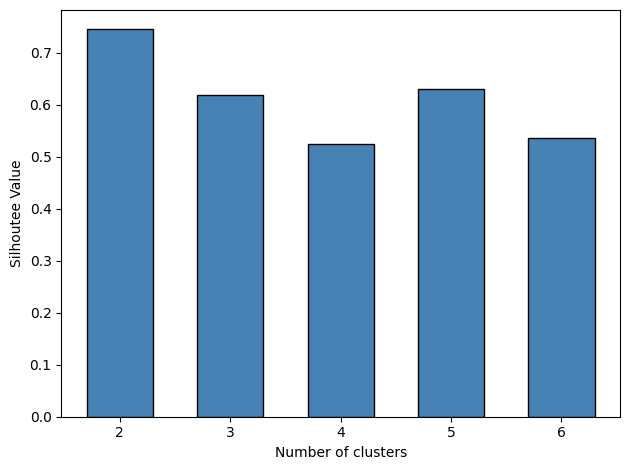

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.bar(range_n_clusters,all_silhoutee, color='steelblue', edgecolor='black', width=0.6)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutee Value')
#plt.title('Silhoutee values and Number of clusters')
plt.tight_layout()  # Adjust the layout
plt.savefig('silhoutee_value.png', dpi=300)  # Save the figure
plt.show()  # Display the figure

# Download the plot (this part works in Google Colab)
files.download('silhoutee_value.png')

##4.2 clustering data & perform featur selection

In [ ]:
flag_featureSelection=True
seasons=[]
if flag_featureSelection:
  seasons.append(df_mean[df_mean['month'].isin([2,3,4,5])].sort_values(by=['Date','Hour'])[selectedFeatures])
  seasons.append(df_mean[df_mean['month'].isin([6,7,8,9,10,11,12,1])].sort_values(by=['Date','Hour'])[selectedFeatures])
else:
  seasons.append(df_mean[df_mean['month'].isin([2,3,4,5])].sort_values(by=['Date','Hour'])[all_Features])
  seasons.append(df_mean[df_mean['month'].isin([6,7,8,9,10,11,12,1])].sort_values(by=['Date','Hour'])[all_Features])
seasons[0]

,Solar_Curtailment,Solar,Renewables,Imports,Net Load,Thermal,Wind_Curtailment,Generation,Large Hydro,Load Less (Generation+Imports),month
0,0.0,0.000000,1848.416667,7413.166667,23074.666667,10405.750000,0.0,15940.333333,1399.083333,2.083333,5
1,0.0,0.000000,1919.833333,7399.666667,21896.750000,9535.833333,0.0,14857.916667,1115.166667,-0.666667,5
2,0.0,0.000000,2010.666667,7468.333333,21390.750000,8836.166667,0.0,14402.583333,1269.750000,0.250000,5
3,0.0,0.000000,2135.166667,7436.250000,21191.500000,8549.750000,0.0,14353.250000,1382.083333,0.166667,5
4,0.0,0.000000,2007.750000,7536.333333,21644.250000,9151.333333,0.0,14576.833333,1130.666667,0.750000,5
...,...,...,...,...,...,...,...,...,...,...,...
70844,0.0,1329.083333,5347.583333,7355.083333,25817.750000,10668.333333,0.0,22055.583333,3760.916667,-0.083333,5
70845,0.0,49.333333,4745.583333,7854.583333,26540.333333,11196.416667,0.0,21647.833333,3426.500000,-0.166667,5
70846,0.0,0.000000,4634.750000,7908.583333,25989.750000,10685.333333,0.0,20903.500000,3304.000000,11.833333,5
70847,0.0,0.000000,4265.583333,8920.583333,24471.333333,8705.083333,0.0,18022.083333,2773.583333,13.333333,5


#5.Create test and train dataset

##5.1Config Parameters

In [ ]:
sampling_rate=1
sequence_length=48 #Considering history of timeseris
predict_step=1 #For example the next 1 hour or next 24 hour
delay=sampling_rate*(sequence_length+predict_step-1)
batch_size=128
test_precent=0.20

## 5.2 create timeseries seasonal dataset

In [ ]:

def create_timeseries_dataset(S_X_data,s_y_solar,s_num_train_samples,delay,sequence_length,sampling_rate,batch_size):
  #for solar
  from keras.utils import timeseries_dataset_from_array
  train_dataset_solar=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_solar[delay:],
      sampling_rate=sampling_rate,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index=s_num_train_samples

  )
  test_dataset_solar=timeseries_dataset_from_array(
      S_X_data[:-delay],
      sequence_length=sequence_length,
      targets=s_y_solar[delay:],
      sampling_rate=sampling_rate,
      shuffle=False,
      batch_size=batch_size,
      start_index=s_num_train_samples

  )
  return [train_dataset_solar,test_dataset_solar]

In [ ]:
#
seasons_datasets=[]

for season in seasons:
  num_train_samples=int(len(season)*(1-test_precent))
  num_test_samples=int(len(season)*(test_precent))
  print(num_train_samples,num_test_samples)
  #Seperate features and targets
  X_data=season.reset_index(drop=True).to_numpy()
  y_solar=season['Solar_Curtailment'].reset_index(drop=True).to_numpy()

  #Normalize input data
  mean_4norm=X_data[:num_train_samples].mean(axis=0)
  X_data-=mean_4norm
  std_4norm=X_data[:num_train_samples].std(axis=0)
  X_data/=std_4norm

  #create time series dataset
  #return [train_dataset_solar,test_dataset_solar]
  test_train_datasets=create_timeseries_dataset(X_data,y_solar,num_train_samples,delay,sequence_length,sampling_rate,batch_size)
  seasons_datasets.append(test_train_datasets)



19056 4764
38199 9549


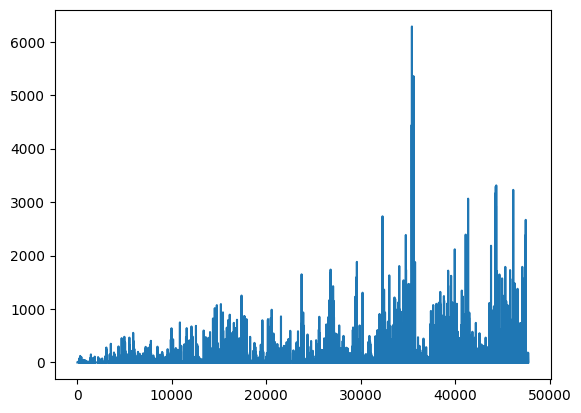

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(y_solar)),y_solar) #the last y_wind from previous for

#6.GRU

##6.1 Solar model

### One layer

In [ ]:
#One LSTM layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(256)(inputs)
x=layers.Dense(16)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_SGRU_solar=keras.Model(inputs,outputs)
model_SGRU_solar.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 11)]          0         
                                                                 
 gru (GRU)                   (None, 256)               206592    
                                                                 
 dense (Dense)               (None, 16)                4112      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 210721 (823.13 KB)
Trainable params: 210721 (823.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/30
149/149 [==============================] - ETA: 0s - loss: 145518.1562 - mae: 137.8876
Epoch 1: val_loss improved from inf to 883797.68750, saving model to solar_season_model
149/149 [==============================] - 71s 458ms/step - loss: 145518.1562 - mae: 137.8876 - val_loss: 883797.6875 - val_mae: 420.3220
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 111793.5156 - mae: 120.6594
Epoch 2: val_loss improved from 883797.68750 to 667119.62500, saving model to solar_season_model
149/149 [==============================] - 44s 295ms/step - loss: 111793.5156 - mae: 120.6594 - val_loss: 667119.6250 - val_mae: 337.6678
Epoch 3/30
149/149 [==============================] - ETA: 0s - loss: 86681.3125 - mae: 96.5924
Epoch 3: val_loss improved from 667119.62500 to 491107.40625, saving model to solar_season_model
149/149 [==============================] - 48s 320ms/step - loss: 86681.3125 - mae: 96.5924 - val_loss: 491107.4062 - val_mae: 282.3311
Epoch 4/30
149

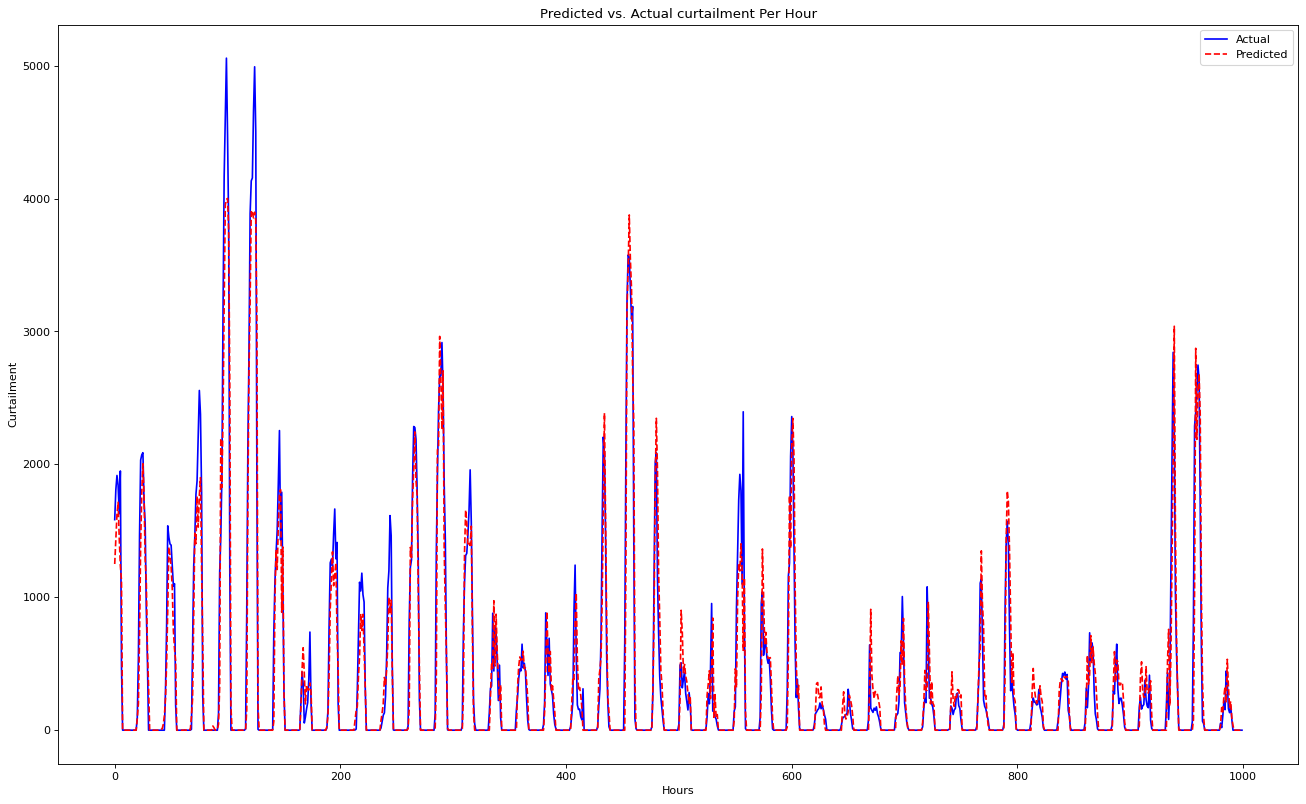

Epoch 1/30
299/299 [==============================] - ETA: 0s - loss: 24537.7832 - mae: 32.6458
Epoch 1: val_loss improved from inf to 46539.00781, saving model to solar_season_model
299/299 [==============================] - 93s 303ms/step - loss: 24537.7832 - mae: 32.6458 - val_loss: 46539.0078 - val_mae: 62.2394
Epoch 2/30
299/299 [==============================] - ETA: 0s - loss: 16734.4082 - mae: 23.3670
Epoch 2: val_loss improved from 46539.00781 to 28420.59570, saving model to solar_season_model
299/299 [==============================] - 89s 298ms/step - loss: 16734.4082 - mae: 23.3670 - val_loss: 28420.5957 - val_mae: 50.7367
Epoch 3/30
299/299 [==============================] - ETA: 0s - loss: 13213.1689 - mae: 20.9770
Epoch 3: val_loss improved from 28420.59570 to 22965.92578, saving model to solar_season_model
299/299 [==============================] - 90s 300ms/step - loss: 13213.1689 - mae: 20.9770 - val_loss: 22965.9258 - val_mae: 51.9107
Epoch 4/30
299/299 [=============

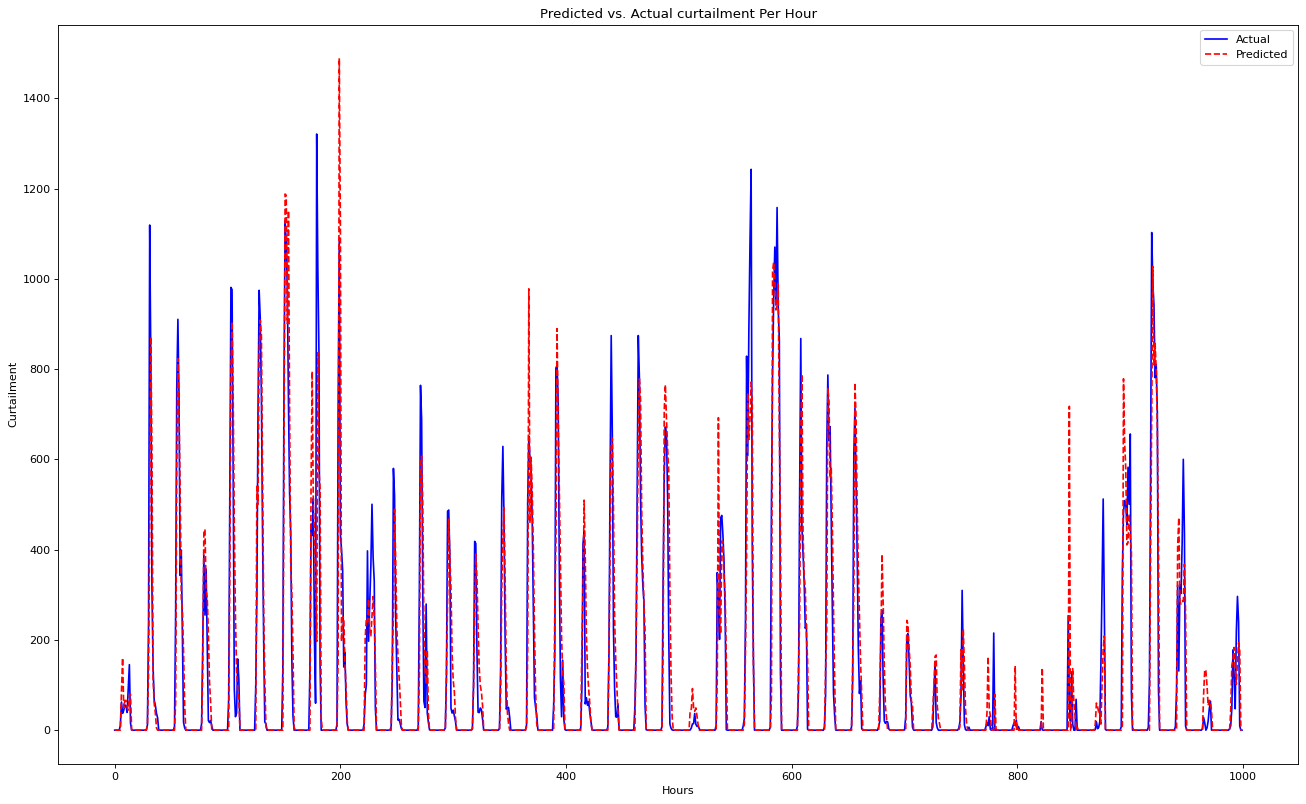

In [ ]:
#Evaluate each seasons with one layer GRU
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[0],season_dataset[1]
  season_model=tf.keras.models.clone_model(model_SGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)

  test_pred=season_model.predict(test_dataset_solar)
  print(test_pred.shape)

  test_target_values=[]
  for batch in test_dataset_solar:
    inputs, targets =batch
    test_target_values+=list(targets)

  print(len(test_target_values))
  from matplotlib.pyplot import figure
  figure(figsize=(20, 12), dpi=80)

  plt.plot(test_target_values[0:1000],"b",label="Actual")
  plt.plot(test_pred[0:1000],"r--",label="Predicted")
  plt.xlabel('Hours', fontsize=20)
  plt.ylabel('Curtailment', fontsize=20)
  # If you want to increase tick size:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
 # plt.title("Predicted vs. Actual curtailment Per Hour")
  plt.legend(loc="upper right", fontsize=20)
  plt.show()



In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.333333+seasons_MAE[1]*0.6666666)

[135.0034637451172, 40.064361572265625]
71.71068129110412


In [ ]:
#with seleted features:
#selectedFeatures=['Solar_Curtailment', 'Solar', 'Renewables', 'Imports', 'Net Load', 'Thermal',
#      'Wind_Curtailment', 'Generation', 'Large Hydro', 'Load Less (Generation+Imports)', 'month']

#[142.6576690673828, 41.77738952636719]
#75.40409903565674



In [ ]:
#with all features [140.99285888671875, 43.31500244140625]
#75.87423803789062


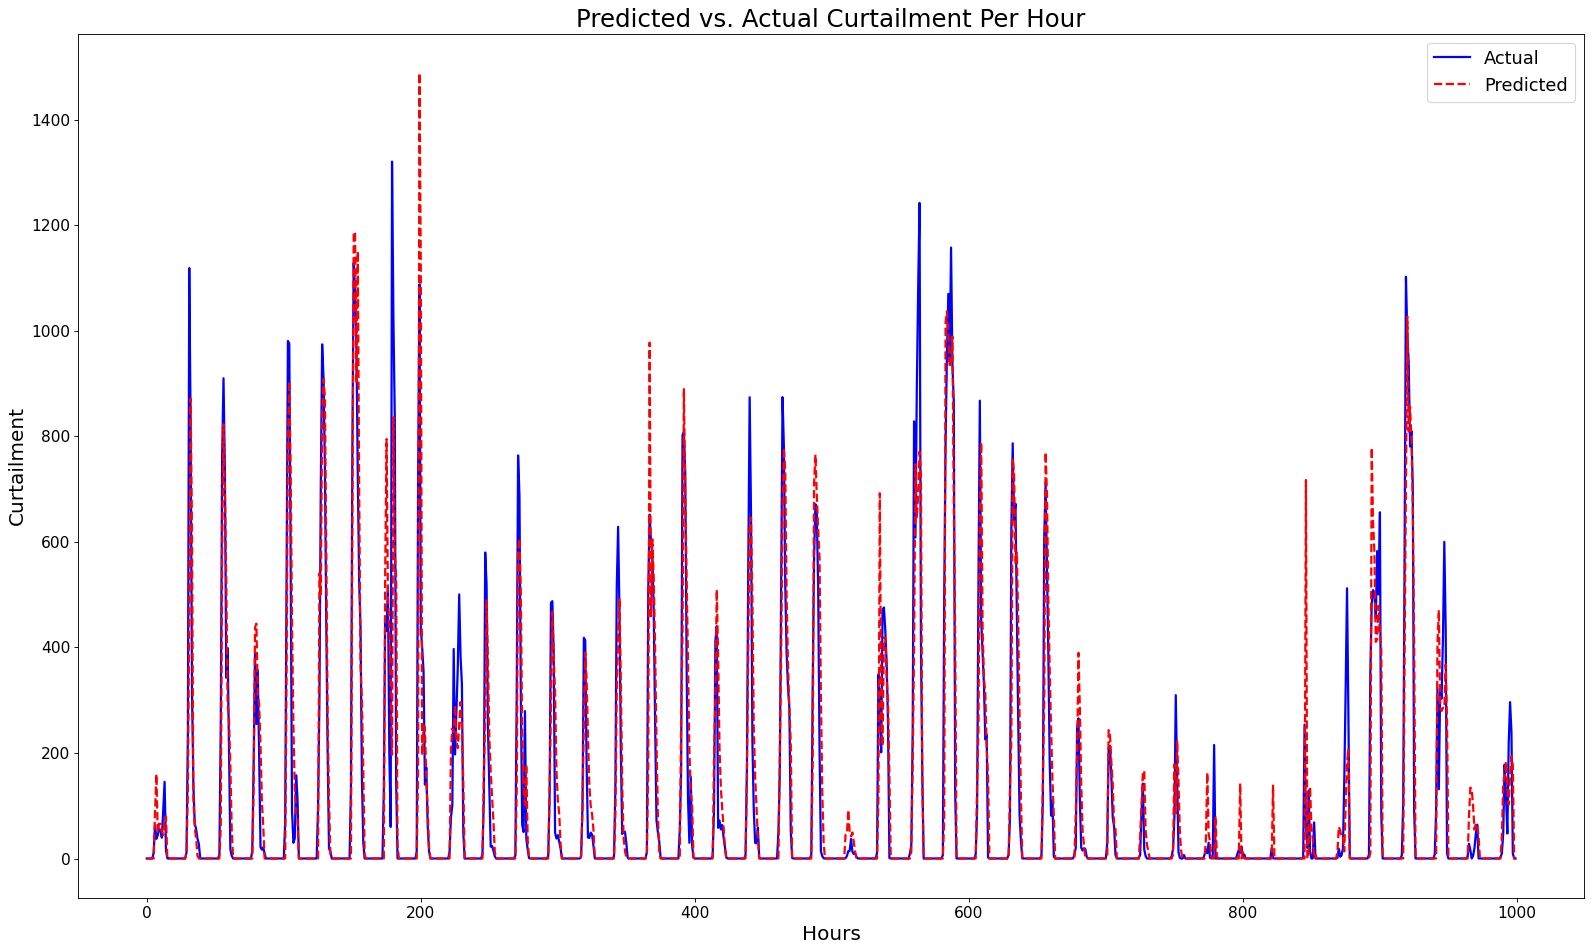

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Your training code remains the same...

# Now for the plotting part
figure(figsize=(20, 12), dpi=80)

# Increase the line width for both actual and predicted lines
plt.plot(test_target_values[0:1000], "b", label="Actual", linewidth=2)
plt.plot(test_pred[0:1000], "r--", label="Predicted", linewidth=2)

# Increase font size for axes labels and title
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Curtailment', fontsize=20)
#plt.title("Predicted vs. Actual Curtailment Per Hour", fontsize=22)

# Adjust the legend to increase font size and potentially change its location
plt.legend(loc="upper right", fontsize=20)

# If you want to increase tick size:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.show()
#plt.title('Silhoutee values and Number of clusters')
plt.tight_layout()  # Adjust the layout
plt.savefig('Predicted vs. Actual.png', dpi=300)  # Save the figure
plt.show()  # Display the figure

# Download the plot (this part works in Google Colab)
files.download('Predicted vs. Actual.png')



### Multi layers

In [ ]:
#Multi layers LSTM

from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(128,return_sequences=True)(inputs)
x=layers.GRU(64)(x)
x=layers.Dense(32)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_mGRU_solar=keras.Model(inputs,outputs)


In [ ]:
#Evaluate each seasons with one layer GRU
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[0],season_dataset[1]
  season_model=tf.keras.models.clone_model(model_mGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)

Epoch 1/30
149/149 [==============================] - ETA: 0s - loss: 156718.4375 - mae: 123.0054
Epoch 1: val_loss improved from inf to 1009270.75000, saving model to solar_season_model
149/149 [==============================] - 48s 295ms/step - loss: 156718.4375 - mae: 123.0054 - val_loss: 1009270.7500 - val_mae: 432.8351
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 130987.5078 - mae: 108.4829
Epoch 2: val_loss improved from 1009270.75000 to 865513.87500, saving model to solar_season_model
149/149 [==============================] - 40s 267ms/step - loss: 130987.5078 - mae: 108.4829 - val_loss: 865513.8750 - val_mae: 378.0661
Epoch 3/30
149/149 [==============================] - ETA: 0s - loss: 102194.6250 - mae: 89.6884
Epoch 3: val_loss improved from 865513.87500 to 707714.18750, saving model to solar_season_model
149/149 [==============================] - 44s 297ms/step - loss: 102194.6250 - mae: 89.6884 - val_loss: 707714.1875 - val_mae: 325.4731
Epoch 4/3

In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.333333+seasons_MAE[1]*0.6666666)

[142.34524536132812, 48.01333236694336]
79.45725271576767


In [ ]:
#with selected features:

#[147.691650390625, 41.3162841796875]
#76.77468759836425



In [ ]:
#All features
#[142.9008331298828, 45.38155746459961]
#77.88793202731247

### With drop out

In [ ]:
#Multi layers LSTM with drop out

from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,X_data.shape[-1])) #shape=(sequnece_lenght, num of features)
x=layers.GRU(128,return_sequences=True,recurrent_dropout=0.25)(inputs)
x=layers.Dropout(0.25)(x)
x=layers.GRU(128)(x)
x=layers.Dense(32)(x)
outputs=layers.Dense(1,activation="relu")(x)
model_dGRU_solar=keras.Model(inputs,outputs)
model_dGRU_solar.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 11)]          0         
                                                                 
 gru_3 (GRU)                 (None, 48, 128)           54144     
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 gru_4 (GRU)                 (None, 128)               99072     
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 157377 (614.75 KB)
Trainable params: 157377 (

In [ ]:
#Evaluate each seasons with one layer GRU
import tensorflow as tf
seasons_MAE=[]
for season_dataset in seasons_datasets:
  callbacks=[keras.callbacks.ModelCheckpoint("solar_season_model",save_best_only=True,monitor="val_loss",mode='min',verbose=1)] #To save best performing model
  train_dataset_solar,test_dataset_solar=season_dataset[0],season_dataset[1]
  season_model=tf.keras.models.clone_model(model_dGRU_solar)
  season_model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  history=season_model.fit(train_dataset_solar,
                             epochs=30,
                             validation_data=test_dataset_solar,
                             callbacks=callbacks)
  season_model=keras.models.load_model("solar_season_model")
  tmp_mae=season_model.evaluate(test_dataset_solar)[1]
  print(f"Test MAE Solar:{tmp_mae:.2f}")
  seasons_MAE.append(tmp_mae)

Epoch 1/30
149/149 [==============================] - ETA: 0s - loss: 145710.2969 - mae: 121.2132
Epoch 1: val_loss improved from inf to 900182.93750, saving model to solar_season_model
149/149 [==============================] - 69s 437ms/step - loss: 145710.2969 - mae: 121.2132 - val_loss: 900182.9375 - val_mae: 397.0180
Epoch 2/30
149/149 [==============================] - ETA: 0s - loss: 104475.4219 - mae: 95.2510
Epoch 2: val_loss improved from 900182.93750 to 672868.37500, saving model to solar_season_model
149/149 [==============================] - 68s 455ms/step - loss: 104475.4219 - mae: 95.2510 - val_loss: 672868.3750 - val_mae: 316.9941
Epoch 3/30
149/149 [==============================] - ETA: 0s - loss: 69849.6094 - mae: 77.1963
Epoch 3: val_loss improved from 672868.37500 to 477300.12500, saving model to solar_season_model
149/149 [==============================] - 66s 446ms/step - loss: 69849.6094 - mae: 77.1963 - val_loss: 477300.1250 - val_mae: 256.0460
Epoch 4/30
149/1

In [ ]:
print(seasons_MAE)
print(seasons_MAE[0]*0.333333+seasons_MAE[1]*0.6666666)

In [ ]:
#Feature selection

[140.5199432373047, 40.14885711669922]
73.60583630699615

In [ ]:
#All features:[140.6529998779297, 40.35311508178711]
#73.78636043929367


In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('my_plot.png')
plt.close()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()